In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.stats import ttest_ind, shapiro, wilcoxon
import seaborn as sns; sns.set()

In [6]:
path = "/home/colombelli/Documents/experiments/Experiments20_ago/"

hom_exps = ["hom_relieff", "hom_geode", "hom_gr", "hom_su", "hom_wx"]
sin_exps = ["sin_relieff", "sin_geode", "sin_gr", "sin_su", "sin_wx"]

exps = ["hyb_stbw_borda", "hyb_borda_borda", "het"] + hom_exps + sin_exps

exp_translation = {
    "het": "Heterogêneo",
    "hyb_stbw_borda": "Híbrido Stb",
    "hyb_borda_borda": "Híbrido Borda",
    "hom_geode": "Homogêneo GeoDE",
    "hom_gr": "Homogêneo Gain Ratio",
    "hom_su": "Homogêneo Symmetrical\nUncertainty",
    "hom_relieff": "Homogêneo ReliefF",
    "hom_wx": "Homogêneo Wx",
    "sin_relieff": "ReliefF",
    "sin_geode": "Characteristic\nDirection",
    "sin_gr": "Gain Ratio",
    "sin_su": "Symmetrical\nUncertainty",
    "sin_wx": "Wx"
}

In [7]:
results = {}

def add_experiment(experiment):
    df = pd.read_csv(path+experiment+"/final_results.csv", index_col=0)
    df['Tipo'] = [exp_translation[experiment] for i in range(len(df))]
    results[experiment] = df
    return

In [8]:
for e in exps:
    add_experiment(e)

In [9]:
renamed_cols= {
    'th_int': 'Quantidade de genes selecionados',
    'stabilities': 'Estabilidade',
    'mean_ACC': 'Acurácia',
    'mean_ROC_AUC': 'ROC AUC'
}

concat_df = pd.concat(list(results.values()))
concat_df = concat_df.rename(columns=renamed_cols, index={'ONE': 'one'})
concat_df['Trade-off'] = concat_df['Estabilidade'] + 2*concat_df['Acurácia']

In [10]:
concat_df['Threshold'] = concat_df['Quantidade de genes selecionados'].astype(str) + ' '

In [11]:
hy_he = concat_df.loc[concat_df['Tipo'].isin(['Heterogêneo', 'Híbrido Stb', 'Híbrido Borda'])]

hy_hom_items = [
    "Híbrido Stb", "Híbrido Borda", "Homogêneo GeoDE", "Homogêneo Gain Ratio", 
    "Homogêneo Symmetrical\nUncertainty", "Homogêneo ReliefF", 
    "Homogêneo Wx"
]

hy_hom = concat_df.loc[concat_df['Tipo'].isin(hy_hom_items)]

In [12]:
xticks = ['1', '5', '10', '15', '25', '50', '75', '100', '150', '200']

In [15]:
path = "/home/colombelli/Documents/experiments/Experiments20_ago/plots/"

def save_plot(y_col, df, title):
    
    style.use('fivethirtyeight')
    sns.set_palette("hls", 7)
    p = sns.lineplot(x="Threshold", y=y_col, data=df, 
                     hue="Tipo", style="Tipo", dashes=False, markers=True, linewidth=2, sort=False)
    #p.set_xticklabels(xticks)
    #p.set(xticks=xticks)
    
    
    plt.title(title)
    leg = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    for line in leg.get_lines():
        line.set_linewidth(1.5)
        
    for line in p.get_lines():
        if line.get_label() == '_line0':
            line.set_linewidth(4.0)
            line.set_zorder(10)
            
    p.get_legend().get_texts()[1].get_fontproperties().set_size(13)
            
    fig1 = plt.gcf()
    plt.show()
    plt.draw()
    fig1.savefig(path+title+"_"+y_col, bbox_inches = "tight")
    
    return

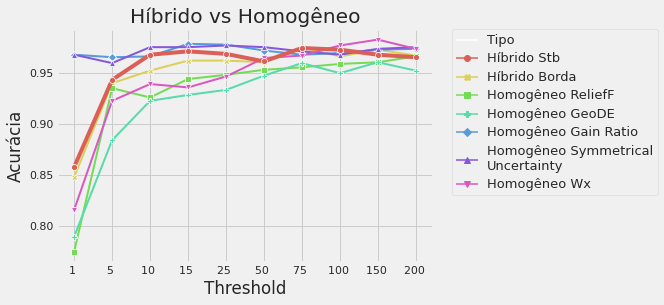

<Figure size 432x288 with 0 Axes>

In [16]:
save_plot("Acurácia", hy_hom, "Híbrido vs Homogêneo")

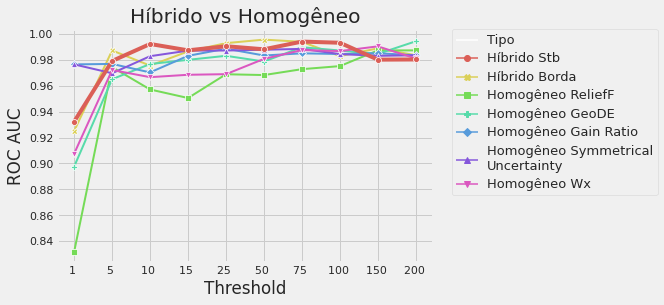

<Figure size 432x288 with 0 Axes>

In [17]:
save_plot("ROC AUC", hy_hom, "Híbrido vs Homogêneo")